# Predict stock market movement based on news headline

## Part 1: Connection between news and stock

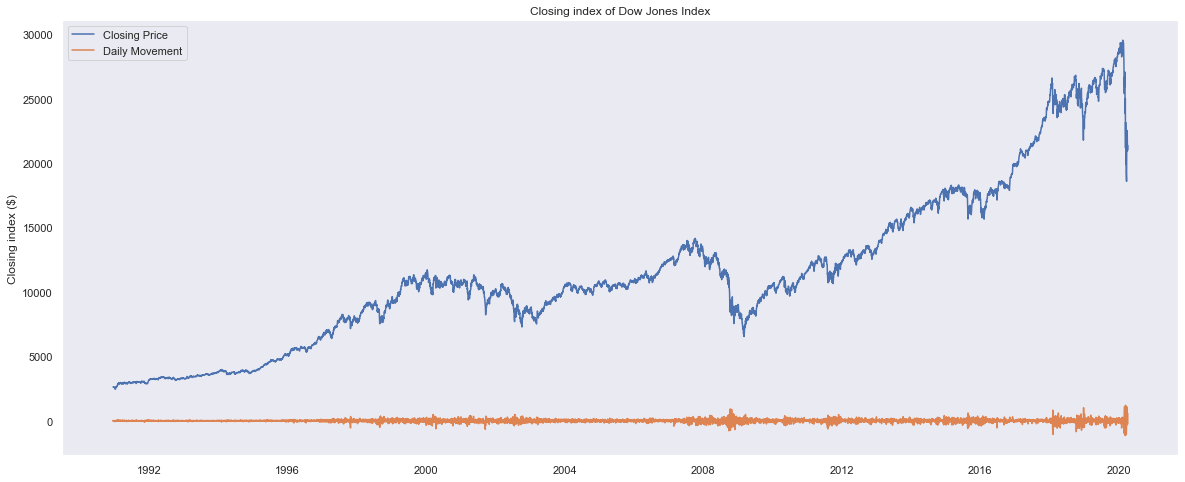

In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

dow_us = pd.read_csv('Dow.csv', index_col=['Date'], parse_dates=['Date'])
dow_us.head(10)
data2= dow_us.dropna()

# Plot closing index

plt.figure(figsize=(20, 8))
plt.plot(data2.Close)
plt.plot(data2.Close - data2.Open)
plt.legend(['Closing Price','Daily Movement'])
plt.title('Closing index of Dow Jones Index')
plt.ylabel('Closing index ($)')
plt.grid(False)
plt.show()

## Part 2: Specific research on specific company

## Boeing's Stock movemnt during 2018.12.31 - 2020.04.01

In this part, we try to use package `trendet`.

It is a Python package for trend detection on stock time series data.

**Installation**

In order to get this package working you will need to install it using pip by typing on the terminal:

>`$ python -m pip install trendet --upgrade`

Or just install the current release or a specific release version such as:

>`$ python -m pip install trendet==0.6`


In the example presented below, the `identify_all_trends` function will be used to detect every **bearish/bullish** trend with a time window above **5** days, which, for example, implies that every bearish (decreasing) trend with a longer length than 5 days will be identified as a down trend.

#### At the 1st part, we found that stock market's movement seems to be related with some incidents which could influence it.

In [1]:
import investpy
import trendet

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

df = trendet.identify_all_trends(equity='BA', 
                                 country='united states', 
                                 from_date='31/12/2018', 
                                 to_date='01/04/2020',
                                 window_size=5,
                                 identify='both')

df.reset_index(inplace=True)

plt.figure(figsize=(20, 10))

ax = sns.lineplot(x=df.index, y=df['Close'])
ax.set(xlabel='Date')

labels = df['Up Trend'].dropna().unique().tolist()

for label in labels:
    sns.lineplot(x=df[df['Up Trend'] == label].index,
                 y=df[df['Up Trend'] == label]['Close'],
                 color='green')

    ax.axvspan(df[df['Up Trend'] == label].index[0],
               df[df['Up Trend'] == label].index[-1],
               alpha=0.2,
               color='green')

labels = df['Down Trend'].dropna().unique().tolist()

for label in labels:
    sns.lineplot(x=df[df['Down Trend'] == label].index,
                 y=df[df['Down Trend'] == label]['Close'],
                 color='red')

    ax.axvspan(df[df['Down Trend'] == label].index[0],
               df[df['Down Trend'] == label].index[-1],
               alpha=0.2,
               color='red')
               
locs, _ = plt.xticks()
labels = []

for position in locs[1:-1]:
    labels.append(str(df['Date'].loc[position])[:-9])

plt.xticks(locs[1:-1], labels)
plt.show()

ModuleNotFoundError: No module named 'investpy'

![](Image/airplane.jpg)

## so what happened during those bullish/bearish peoroid?
### **first bullish**: 2019 Jan - 2019 March 

>![](Image/Boeing1up.png)
>![](Image/Boeing2up.png)
>![](Image/Boeing6up.png)

### **Bearish**: 2019 March

>![](Image/Boeing3down.png)
>![](Image/Boeing4down.png)
>![](Image/Boeing5down.png)

### **Bearish**: 2019 December

>![](Image/Boeing7down.jpg)
>![](Image/Boeing8down.jpg)
>![](Image/Boeing9down.jpg)

# Part 3: 

In [317]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from datetime import date
import os
import json

In [314]:
#IMPORT our data source, which is a json file include classified data

file = open("news.json", 'r')
papers = []
for line in file.readlines():
    dic = json.loads(line)
    papers.append(dic)

df = pd.DataFrame(papers, columns=['category','headline','authors' ,'link', 'short_description', 'date']) 
# export business news to csv file ready to merge with SP500 data

df2 = df.groupby('date').headline.apply(list).reset_index()
df2.to_csv('All.csv',encoding = 'utf-8')


In [319]:
#process SP500 data
sp500 = pd.read_csv('SP500.csv', index_col=['date'], parse_dates=['date'])
sp500.head(10)

Open         High          Low        Close    Adj Close  \
date                                                                          
2012-01-30  1316.160034  1316.160034  1300.489990  1313.010010  1313.010010   
2012-01-31  1313.530029  1321.410034  1306.689941  1312.410034  1312.410034   
2012-02-01  1312.449951  1330.520020  1312.449951  1324.089966  1324.089966   
2012-02-02  1324.239990  1329.189941  1321.569946  1325.540039  1325.540039   
2012-02-03  1326.209961  1345.339966  1326.209961  1344.900024  1344.900024   
2012-02-06  1344.319946  1344.359985  1337.520020  1344.329956  1344.329956   
2012-02-07  1344.329956  1349.239990  1335.920044  1347.050049  1347.050049   
2012-02-08  1347.040039  1351.000000  1341.949951  1349.959961  1349.959961   
2012-02-09  1349.969971  1354.319946  1344.630005  1351.949951  1351.949951   
2012-02-10  1351.209961  1351.209961  1337.349976  1342.640015  1342.640015   

                Volume  
date                    
2012-01-30  3659010000  
2012-01-31  4235550000  
2012-02-01  4504360000  
2012-02-02  4120920000  
2012-02-03  4608550000  
2012-02-06  3379700000  
2012-02-07  3742460000  
2012-02-08  4096730000  
2012-02-09  4209890000  
2012-02-10  3877580000

In [195]:
#export to csv ready to merge
sp500['label'] = difflist 
sp500_1 = sp500.drop(columns = ['Open','High','Low','Close','Adj Close', 'Volume'])
sp500_1.to_csv('sp500_Label.csv',encoding = 'utf-8')

In [189]:
# set rise = 1, fall = 0
difflist = []
for index, row in sp500.iterrows():
    i = 0
    diff = row['Close'] - row['Open']
    if diff>0:
        difflist.append(1)
    else:
        difflist.append(0)
print(difflist)

[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 

In [320]:
#use excel to merge our news and SP500 data, read it in
data = pd.read_csv('AllWithLable.csv',encoding = 'utf-8')
data
#divide to train and test by date
train = data[data['date'] < '2018-01-31']
test = data[data['date'] > '2018-02-01']
print(len(test))
print(len(train))

101
1491


In [321]:
#read label as test result
y_train = train['label'].values
y_test = test['label'].values
y_train

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [322]:
#read everyday's news to a element of array
X_train = train[train.columns[3]]
X_train = np.array(X_train)

X_train2 = []
for x1 in X_train:
    X_train2.append(x1)
    
X_train2

['["Jessica Hoppe, Blogger Behind \'Having It All\' Has Become That Girl Who Shows Baby Pictures At Parties (PHOTOS)", "Indiana Welcomes Super Bowl Fans With Children\'s Postcards (PHOTOS)", \'Be Not Afraid: How Travel Disarms Media Hype\', \'Water Parks In Miami: A Huffington Post Travel Guide\', \'10 Dips, Nibbles And Dishes For Game Day\', \'Isabella Rossellini Models For Betsey Johnson, 1995: A Look Back\', \'Small Town Life In The Peruvian Andes\', "Self-Acceptance: Are You an \'Alchemist\' or a \'Leopard\'?", \'Can You Build a Fitness Habit in 21 Days?\', \'5 Places To Meet The Bears In B.C.\', \'9 Korean Recipes: Go Outside Your Comfort Zone\', \'Q10 With Carol Woolton\', \'Forbidding Your Daughter To Visit A Friend When Only The Dad Is Home\', \'We Met On A Plane: New Website Reconnects Flyers Who Forget To Exchange Numbers\', "\'Today Show\' Learns Absurd Men\'s Grooming & Fashion Words (VIDEO)", \'David Beckham H&M Underwear Commercial Is Everything We Hoped For (VIDEO)\', \'

In [323]:
X_test = test[test.columns[3]]
X_test = np.array(X_test)

X_test2 = []
for x1 in X_test:
    X_test2.append(x1)
    
X_test2

['[\'15 Times Running Water Was No Match For This Crazy Cold Weather\', "States Across U.S. See Record-Cold New Year\'s Day As Rest Of The World Boils", "Cop Stops Erykah Badu On NYE To \'Say Hi\'", \'Whoopi Goldberg Had Some Iconic Words For Tiffany Haddish Before She Hosted 鈥楽NL鈥?, \'Eva Longoria Celebrates Growing Family In Cozy Pregnancy Photo\', \'White House Says Secret Rounds Of Golf Make Donald Trump A Better President\', \'Ryan Reynolds Totally Delivered When Asked Which Famous Chris Is Hottest\', \'Women Fight Back After Assaults At Music Festivals Down Under\', \'Social Media Sites In Germany Can Now Be Fined Millions For Not Deleting Hate Speech\', \'Over 450 Protesters Arrested In Tehran During Crackdown On Anti-Government Demonstrations\', \'South Korea Offers Talks With Defiant North Ahead Of Olympics\', \'Right-Wing Israeli Government Moves Even Further Away From 2-State Solution\', "What\'s Behind Iran\'s Massive Anti-Government Protests", \'Felony Conviction Rates Hav

In [324]:
#build corpus
corpus = X_train

In [325]:
#divide sentence to words
from nltk.tokenize import word_tokenize
corpus2 = [word_tokenize(x) for x in corpus]
X_train3 = [word_tokenize(x) for x in X_train2]
X_test3 = [word_tokenize(x) for x in X_test2]

In [326]:
print(X_train3[-100:])

[['[', '``', 'Earthquake', 'In', 'China', "'s", 'Sichuan', 'Province', 'Kills', 'At', 'Least', '19', ',', 'Injures', '247', "''", ',', "'News", 'Roundup', 'for', 'August', '9', ',', '2017', "'", ',', "'New", 'Hampshire', 'Sues', 'Purdue', 'Pharma', 'Over', 'Opioid', 'Marketing', 'Practices', "'", ',', "'", '#', 'OnlyYou', ',', '#', 'TeamSmokey', "'", ',', "'Up", 'To', '50', 'Migrants', 'Killed', 'Off', 'Coast', 'Of', 'Yemen', 'After', 'Smuggler', 'Forces', 'Them', 'Overboard', "'", ',', "'Kuwait", 'Reportedly', 'Deports', '76', 'Gay', 'Men', 'In', 'Crackdown', "'", ',', "'Time", 'To', 'Dispatch', 'Some', 'World', 'Class', 'Diplomatic', 'Envoys', 'In', 'Pyongyang', "'", ',', "'Vehicle", 'Crashes', 'Into', 'French', 'Soldiers', 'In', 'Paris', 'Suburb', ',', 'Injuring', '6', "'", ',', "'Matt", 'Thorn', 'Talks', 'Trump鈥檚', 'Transgender', 'Military', 'Ban', 'and', 'LGBTQ', 'Issues', '(', 'AUDIO', ')', "'", ',', "'Trump", 'And', 'His', 'Manipulation', 'Of', 'The', 'American', 'Psyche', "'", 

In [327]:
len(corpus2)

1491

In [328]:
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
stop = stopwords.words('english')

# delete numbers
import re
def hasNumbers(inputString):
    return bool(re.search(r'\d', inputString))
 
# delete symbol
def isSymbol(inputString):
    return bool(re.match(r'[^\w]', inputString))
 
# lemma
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
 
def check(word):
 #check element 
    word= word.lower()
    if word in stop:
        return False
    elif hasNumbers(word) or isSymbol(word):
        return False
    else:
        return True
 
# process words
def preprocessing(sen):
    res = []
    for word in sen:
        if check(word):
             if len(word)>1:
                #delete useless words
                word = word.lower()
                #if this element satisfied requirement, append to list
                res.append(wordnet_lemmatizer.lemmatize(word))
    return res            


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\WU\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [329]:
#start process our dataset
corpus3 = [preprocessing(x) for x in corpus2]
X_train = [preprocessing(x) for x in X_train3]
X_test = [preprocessing(x) for x in X_test3]

In [330]:
#divide corpus into 2-dimension list for vectorization model 
corpus4 = []
for x1 in corpus3:
    for x in x1:
        corpus4.append(x)
index = 0
corpus5 = []
arrbuff = []
for x in corpus4:
    
    arrbuff.append(x)
    index = index+1
    if index == 10:
        corpus5.append(arrbuff)
        arrbuff = []
        index = 0
len(corpus5)

80953

In [331]:
#build Vectorization model
from gensim.models.word2vec import Word2Vec
model = Word2Vec(corpus5, size=128, window=5, min_count=5, workers=4)
#test a word
model.wv['work']

array([-0.6551771 , -0.0567864 , -0.10255691, -0.18014328, -0.4116265 ,
       -0.09989725,  0.25289896, -0.35769856,  0.45843443,  0.28779116,
       -0.47522724, -0.2609546 , -0.06996266, -0.08693685,  0.39799988,
        0.3471263 ,  0.01431828,  0.55761266,  0.17047544, -0.4514966 ,
       -0.05775164,  0.3361118 ,  0.08800787,  0.13121179,  0.8481819 ,
       -0.6929581 , -0.0934746 ,  0.26742244, -0.48240623,  0.47635898,
        0.14260073,  0.5221908 ,  0.1618659 ,  0.1752289 , -0.2218223 ,
       -0.2450424 ,  0.3141579 , -0.4671277 , -0.03460887, -0.22548042,
       -0.31945258,  0.03913292, -0.23515613, -0.06228296,  0.4078517 ,
        0.17167687,  0.04507109,  0.60835767, -0.7676676 ,  0.17274609,
       -0.4235588 ,  0.0127402 , -0.17917922,  0.5869901 , -0.499913  ,
        0.5806433 ,  0.05276375,  0.15390296,  0.34561798,  0.070778  ,
        0.3165572 ,  0.22573882,  0.22829652, -0.12454937,  0.40159318,
        0.02055526, -0.01395858, -0.11745413, -0.29621044, -0.38

In [332]:
vocab = model.wv.vocab
#get vector of everyday by take the average of each words
def get_vector(word_list):
    #build array
    res = np.zeros([128])
    count=0
    for word in word_list:
        if word in vocab:   
            res += model[word]
            count += 1
    return res/count

In [333]:
#build vector， drop data if vector = NAN
X_train_V = [get_vector(x) for x in X_train]
X_test_V = [get_vector(x) for x in X_test]

for i in range(len(X_train_V)):
    if np.isnan(X_train_V[i][0]):
        X_train_V[i] = np.zeros([128])
        
for i in range(len(X_test_V)):
    if np.isnan(X_test_V[i][0]):
        X_test_V[i] = np.zeros([128])

##  Fitting with SVR model

Text(0, 0.5, 'Score')

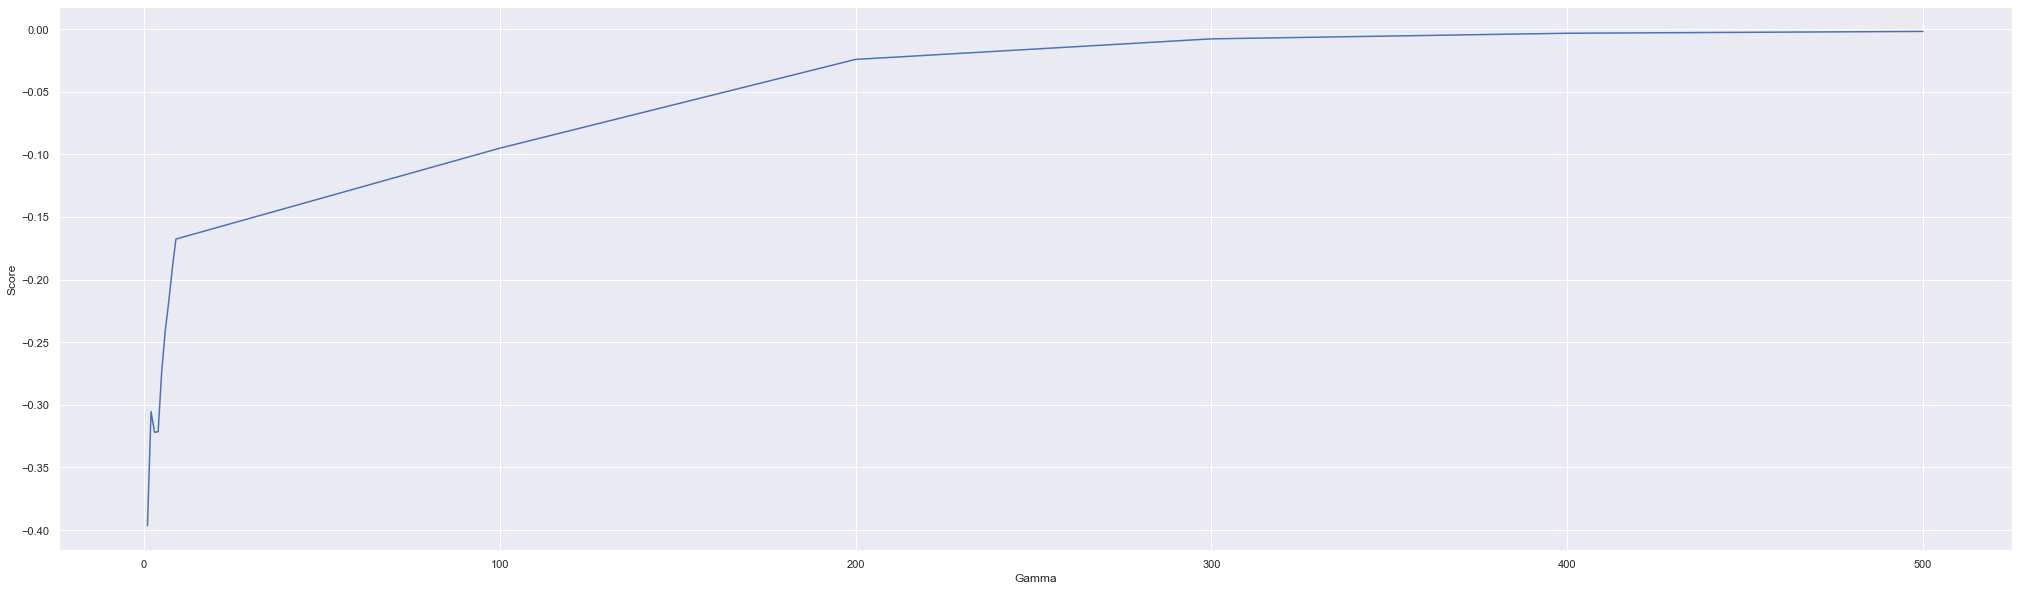

In [335]:
#test SVC model with different params(gamma)
from sklearn.svm import SVR
params = [1,2,3,4,5,6,7,8,9,100,200,300,400,500]
test_scores = []
for param in params:
    clf = SVR(gamma = param)
    clf.fit(X_train_V, y_train, sample_weight = None)
    clf.predict(X_test_V)
    test_scores.append(clf.score(X_test_V, y_test))
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(35, 10))
plt.plot(params, test_scores)
plt.xlabel("Gamma")
plt.ylabel("Score")

## We can see that our data is not fitting with SVR model, Now we try SVC

Text(0, 0.5, 'Score')

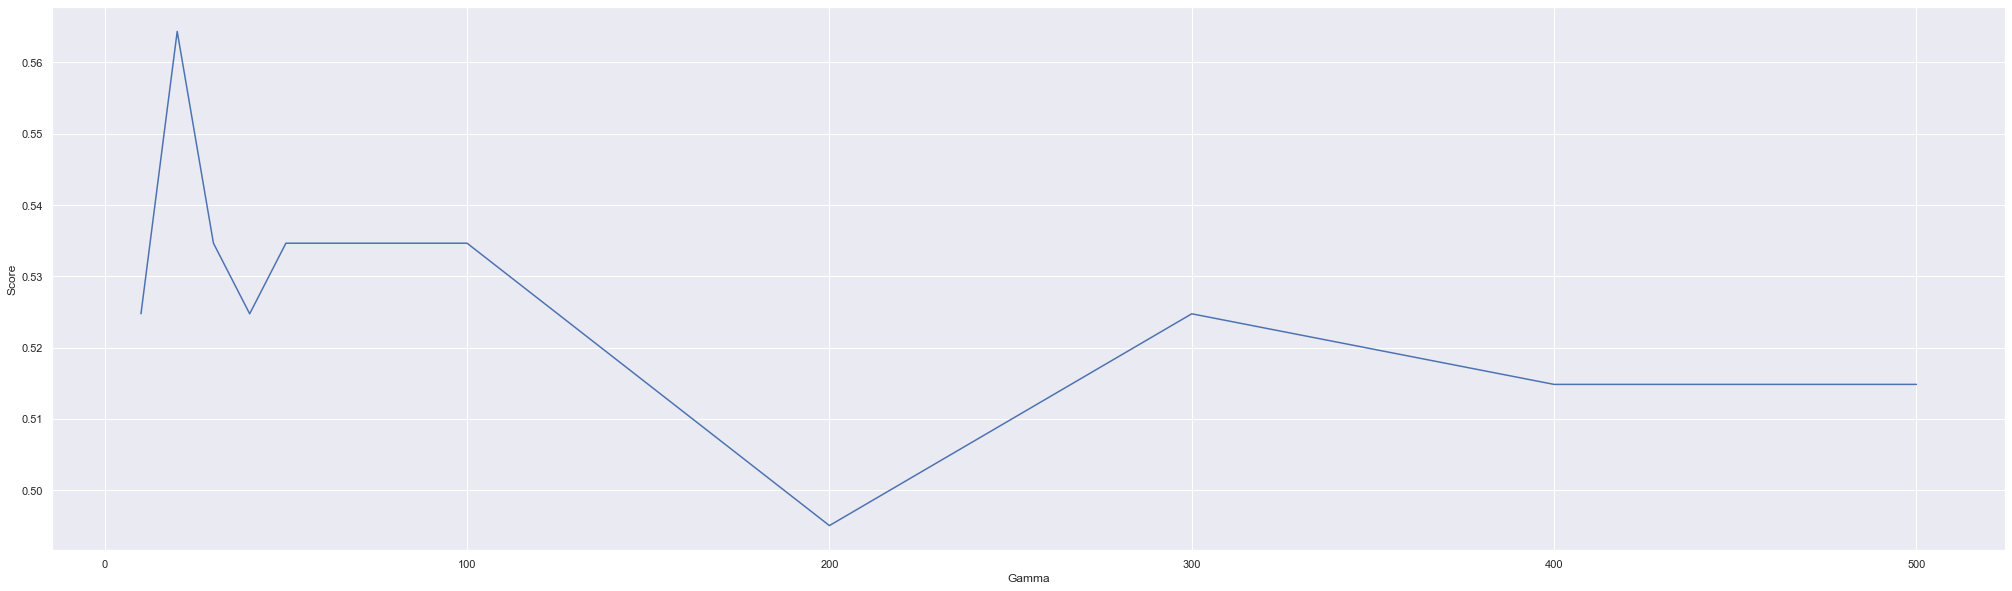

In [362]:
#test SVC model with different params(gamma)
from sklearn.svm import SVC
params = [10,20,30,40,50,60,70,80,90,100,200,300,400,500]
test_scores = []
for param in params:
    clf = SVC(gamma = param)
    clf.fit(X_train_V, y_train, sample_weight = None)
    clf.predict(X_test_V)
    test_scores.append(clf.score(X_test_V, y_test))
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(35, 10))
plt.plot(params, test_scores)
plt.xlabel("Gamma")
plt.ylabel("Score")

## Try to find a best param to earn a higher score

Text(0, 0.5, 'Score')

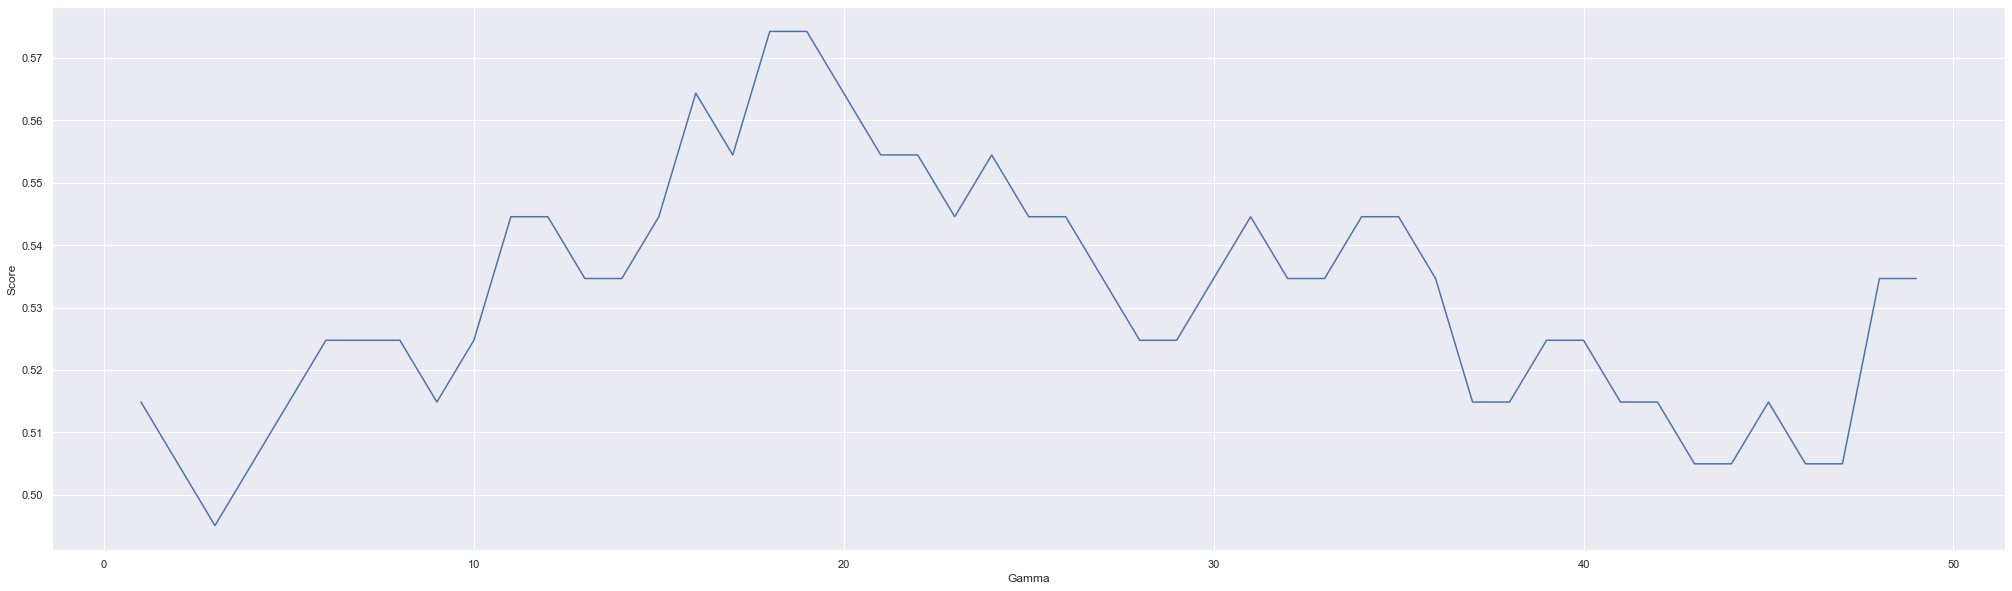

In [363]:

from sklearn.svm import SVC
params = range(1,50)
test_scores = []
for param in params:
    clf = SVC(gamma = param)
    clf.fit(X_train_V, y_train, sample_weight = None)
    clf.predict(X_test_V)
    test_scores.append(clf.score(X_test_V, y_test))
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(35, 10))
plt.plot(params, test_scores)
plt.xlabel("Gamma")
plt.ylabel("Score")

## Using our best parameter to get best score

In [365]:
#we can get the best score when gamma = 4000
from sklearn.svm import SVC

clf2 = SVC(gamma = 19)
clf2.fit(X_train_V,y_train)
clf2.predict(X_test_V)
clf2.score(X_test_V,y_test)

0.5742574257425742

### Generate detailed report

In [344]:
import sklearn.metrics as sm

bg = sm.classification_report(y_test,clf2.predict(X_test_V))
print(bg, sep='\n')

              precision    recall  f1-score   support

           0       0.62      0.31      0.41        49
           1       0.56      0.83      0.67        52

    accuracy                           0.57       101
   macro avg       0.59      0.57      0.54       101
weighted avg       0.59      0.57      0.54       101



-------------------------------

# Now we can try some different models
##  Naive Bayes

In [345]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

models = []
gnb_model = GaussianNB()
gnb_model.fit(X_train_V, y_train)
models.append(['Naive Bayes', gnb_model])
gnb_model.predict(X_train_V)
gnb_model.score(X_test_V,y_test)

0.5148514851485149

In [347]:
import sklearn.metrics as sm

bg = sm.classification_report(y_test,gnb_model.predict(X_test_V))
print(bg, sep='\n')

              precision    recall  f1-score   support

           0       0.50      0.90      0.64        49
           1       0.62      0.15      0.25        52

    accuracy                           0.51       101
   macro avg       0.56      0.53      0.44       101
weighted avg       0.56      0.51      0.44       101



## Logistic Regression

In [348]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train_V, y_train)
lr_model.predict(X_test_V)
lr_model.score(X_test_V, y_test)

0.5247524752475248

In [349]:
import sklearn.metrics as sm
bg = sm.classification_report(y_test,lr_model.predict(X_test_V))
print(bg, sep='\n')

              precision    recall  f1-score   support

           0       0.54      0.14      0.23        49
           1       0.52      0.88      0.66        52

    accuracy                           0.52       101
   macro avg       0.53      0.51      0.44       101
weighted avg       0.53      0.52      0.45       101



## Random forest

Text(0, 0.5, 'Score')

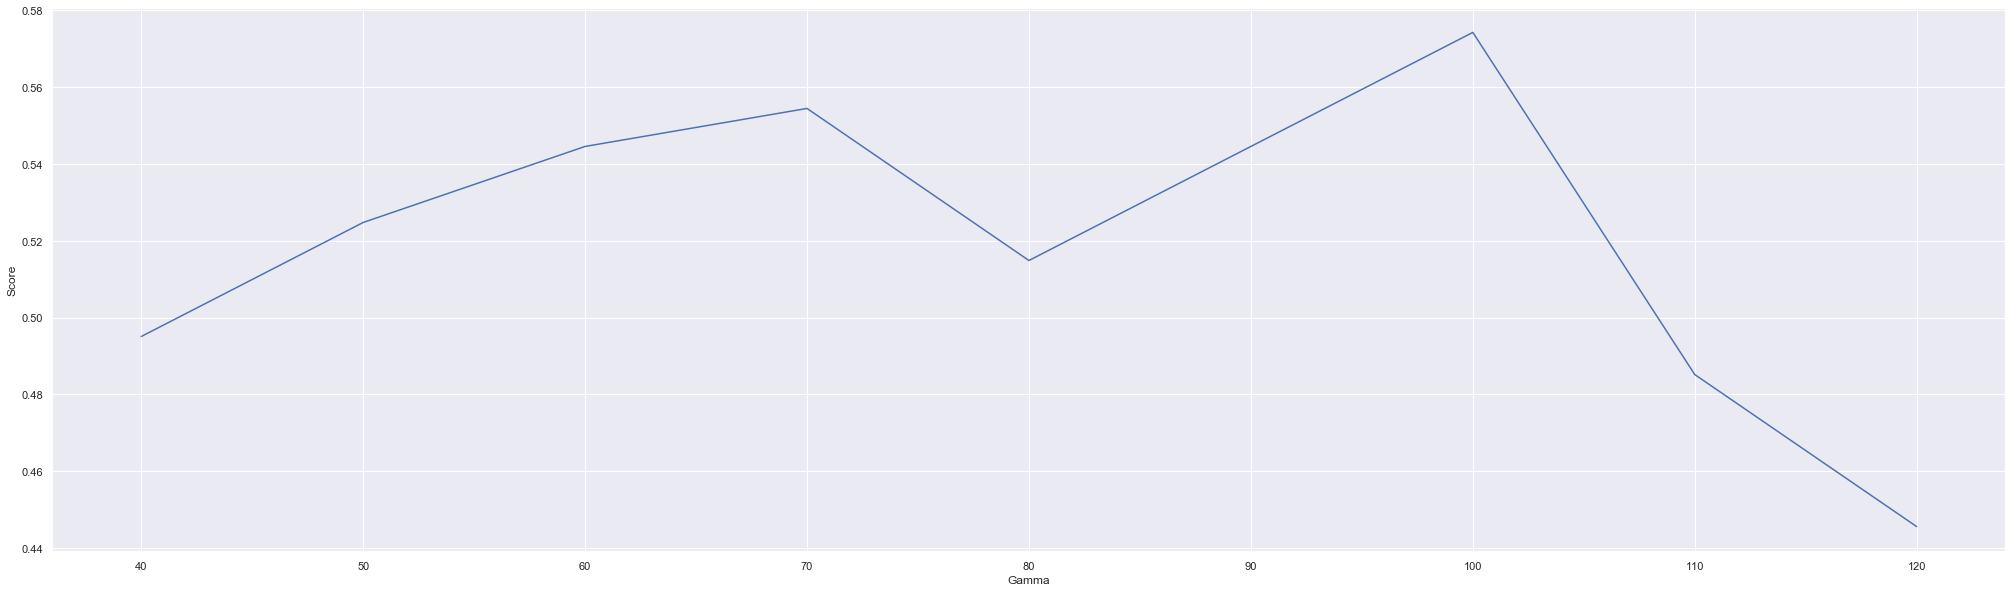

In [358]:
from sklearn.ensemble import RandomForestClassifier
rf_param_grid = [40,50,60,70,80,90,100,110,120]
models = []
for param in rf_param_grid:
    rf_model = RandomForestClassifier()
#rf_model.fit(rf_model,X_train_V, y_train,rf_param_grid, cv=3)
    rf_model.fit(X_train_V, y_train, param)
    rf_model.predict(X_test_V)
  
    models.append(rf_model.score(X_test_V,y_test))

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(35, 10))
plt.plot(rf_param_grid, models)
plt.xlabel("Gamma")
plt.ylabel("Score")

In [359]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_V, y_train, 100)
rf_model.predict(X_test_V)
rf_model.score(X_test_V,y_test)

0.5643564356435643

In [360]:
bg = sm.classification_report(y_test, rf_model.predict(X_test_V) )
print(bg, sep='\n')

              precision    recall  f1-score   support

           0       0.57      0.43      0.49        49
           1       0.56      0.69      0.62        52

    accuracy                           0.56       101
   macro avg       0.57      0.56      0.55       101
weighted avg       0.56      0.56      0.56       101



### We can see that SVC model have better accuracy compared to others.

# Now, we can try to predict using news from business category
## If we can earn a better result

In [ ]:
#IMPORT our data source, which is a json file include classified data

file = open("news.json", 'r')
papers = []
for line in file.readlines():
    dic = json.loads(line)
    papers.append(dic)

df = pd.DataFrame(papers, columns=['category','headline','authors' ,'link', 'short_description', 'date']) 
# export business news to csv file ready to merge with SP500 data
df1 = df.loc[df['category'] == 'BUSINESS']
df2 = df1.groupby('date').headline.apply(list).reset_index()
df2.to_csv('Business.csv',encoding = 'utf-8')


In [447]:
#use excel to merge our news and SP500 data, read it in
dataB = pd.read_csv('BusinessWithLable.csv',encoding = 'utf-8')
dataB
#divide to train and test by date
trainB = dataB[dataB['date'] <='2017/11/31']
testB = dataB[dataB['date'] >='2017/12/01']
print(len(testB))
print(len(trainB))

181
687


In [448]:
#read label as test result
y_trainB = trainB['label'].values
y_testB = testB['label'].values
y_trainB

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,

In [449]:
#read everyday's news to a element of array
X_trainB = trainB[trainB.columns[3]]
X_trainB = np.array(X_trainB)

X_trainB2 = []
for x1 in X_trainB:
    X_trainB2.append(x1)

X_testB = testB[testB.columns[3]]
X_testB = np.array(X_testB)

X_testB2 = []
for x1 in X_testB:
    X_testB2.append(x1)


In [450]:
#build corpus
corpusB = X_trainB

In [451]:
#divide sentence to words
from nltk.tokenize import word_tokenize
corpusB2 = [word_tokenize(x) for x in corpusB]
X_trainB3 = [word_tokenize(x) for x in X_trainB2]
X_testB3 = [word_tokenize(x) for x in X_testB2]

In [452]:
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
stop = stopwords.words('english')

# delete numbers
import re
def hasNumbers(inputString):
    return bool(re.search(r'\d', inputString))
 
# delete symbol
def isSymbol(inputString):
    return bool(re.match(r'[^\w]', inputString))
 
# lemma
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
 
def check(word):
 #check element 
    word= word.lower()
    if word in stop:
        return False
    elif hasNumbers(word) or isSymbol(word):
        return False
    else:
        return True
 
# process words
def preprocessing(sen):
    res = []
    for word in sen:
        if check(word):
             if len(word)>1:
                #delete useless words
                word = word.lower()
                #if this element satisfied requirement, append to list
                res.append(wordnet_lemmatizer.lemmatize(word))
    return res            


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\WU\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [453]:
#start process our dataset
corpusB3 = [preprocessing(x) for x in corpusB2]
X_trainB = [preprocessing(x) for x in X_trainB3]
X_testB = [preprocessing(x) for x in X_testB3]

In [454]:
#process corpus for word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
words = " "
for x1 in X_trainB:
    for x in x1:
        if len(x)>3:
            words+= " "+x
print(words)

  strike city fails distract black friday shopper best black friday ever despite protest crowd kind walmart want country striker prepare black friday protest across country protester tweet picture black friday protest photo black friday insane moment caught tape video planet wal-martyrs mexican bribery improving work relationship year christmas hour euronext sued jersey pension fund sale store open christmas open christmas kill cliff instead economy state doling best worst benefit summer pioneering youth entrepreneurship program time make bold move christmas carol banker corona help occupy l.a. return foreclosed home holiday video greek dodger escaping crackdown report paul krugman fiscal crisis prophet member doomsday cult scene fascinating controversial wall street firm prophecy fails nytimes.com ethos water founder peter thum venture liberty united start freezing twinkie shipping danone possibly price-fixed infant formula milk china common interview question actually illegal bath be

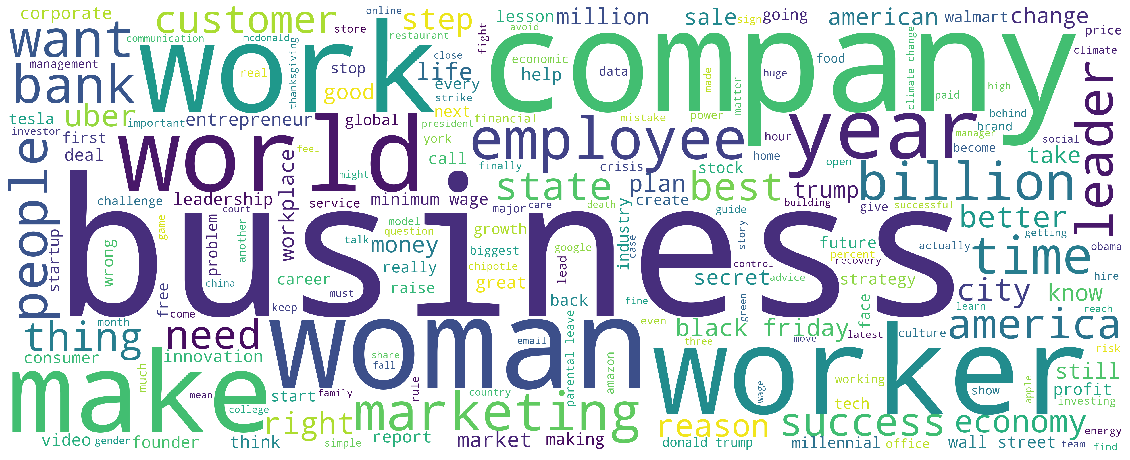

In [455]:
#generate word cloud
my_wordcloud = WordCloud(background_color="white",width=5000, height=2000, margin=5).generate(words)
plt.figure(figsize=(20,10))
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

In [456]:
#divide corpus into 2-dimension list for vectorization model 
corpusB4 = []
for x1 in corpusB3:
    for x in x1:
        corpusB4.append(x)
index = 0
corpusB5 = []
arrbuffB = []
for x in corpusB4:
    
    arrbuffB.append(x)
    index = index+1
    if index == 5:
        corpusB5.append(arrbuffB)
        arrbuffB = []
        index = 0
len(corpusB5)

3065

In [457]:
#build Vectorization model
from gensim.models.word2vec import Word2Vec
model = Word2Vec(corpusB5, size=128, window=5, min_count=5, workers=4)
#test a word
model.wv['work']

array([-5.6065549e-03,  1.7327338e-03, -3.8422344e-03,  6.7541613e-03,
        3.9382065e-03, -4.6670853e-04, -2.2590696e-03,  1.9087999e-03,
        7.2182347e-03, -5.5603479e-04, -2.0500533e-03, -8.7561534e-04,
       -3.8877833e-03, -4.7422894e-03,  7.4127631e-04,  3.3176572e-03,
       -2.6946987e-03,  1.9497282e-03,  6.7164254e-04, -7.1008381e-04,
        6.6249832e-03, -4.1387687e-03,  3.1231539e-03,  5.8497284e-03,
        1.2361957e-03, -1.8565075e-03, -2.7495045e-03,  2.1504124e-03,
       -3.3363570e-03,  1.9344604e-03, -6.0160807e-04, -3.6758210e-03,
        2.0416023e-03,  9.0028922e-04, -1.4601926e-03, -2.0246633e-04,
       -6.6092378e-04,  5.5304789e-03, -6.0329353e-04, -8.8041509e-04,
        3.6649327e-04, -2.8496012e-03, -1.6846579e-03,  2.5517499e-04,
        4.3841819e-03, -8.2116603e-04, -1.0593117e-03,  6.2111928e-03,
       -5.1371357e-03, -1.1137985e-03, -5.6091733e-03,  1.5180944e-03,
        1.0309431e-03,  3.0837520e-03,  1.2261664e-03, -3.8119152e-03,
      

In [458]:
vocab = model.wv.vocab
#get vector of everyday by take the average of each words
def get_vector(word_list):
    #build array
    res = np.zeros([128])
    count=0
    for word in word_list:
        if word in vocab:   
            res += model[word]
            count += 1
    return res/count

In [459]:
#build vector， drop data if vector = NAN
X_train_VB = [get_vector(x) for x in X_trainB]
X_test_VB = [get_vector(x) for x in X_testB]

for i in range(len(X_train_VB)):
    if np.isnan(X_train_VB[i][0]):
        X_train_VB[i] = np.zeros([128])
        
for i in range(len(X_test_VB)):
    if np.isnan(X_test_VB[i][0]):
        X_test_VB[i] = np.zeros([128])

##  Fitting with SVC model

Text(0, 0.5, 'Score')

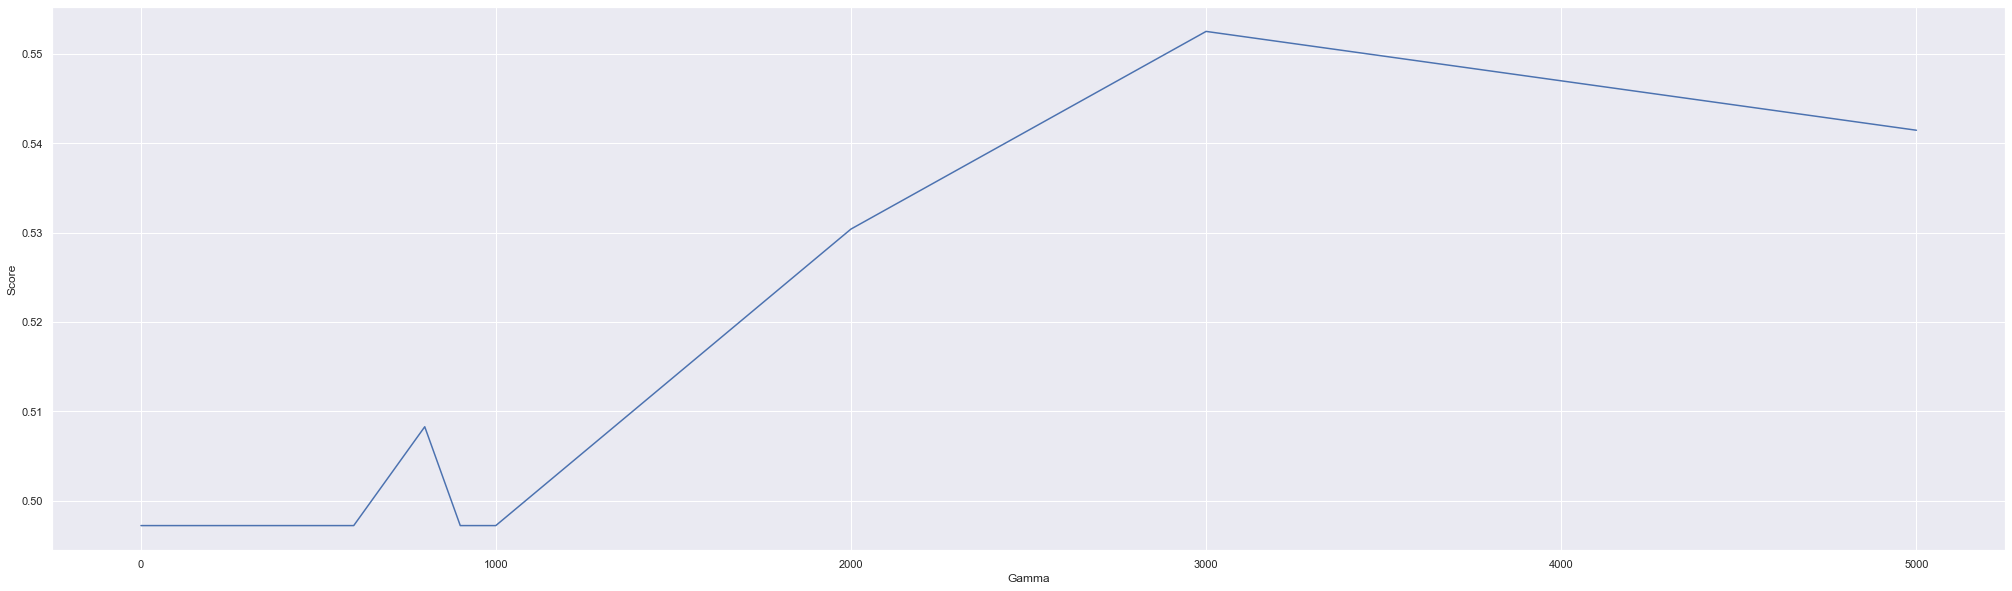

In [460]:
#test SVC model with different params(gamma)
from sklearn.svm import SVC
params = [1,2,3,4,5,6,7,8,9,100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000]
test_scores = []
for param in params:
    clf = SVC(gamma = param)
    clf.fit(X_train_VB, y_trainB, sample_weight = None)
    clf.predict(X_test_VB)
    test_scores.append(clf.score(X_test_VB, y_testB))
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(35, 10))
plt.plot(params, test_scores)
plt.xlabel("Gamma")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

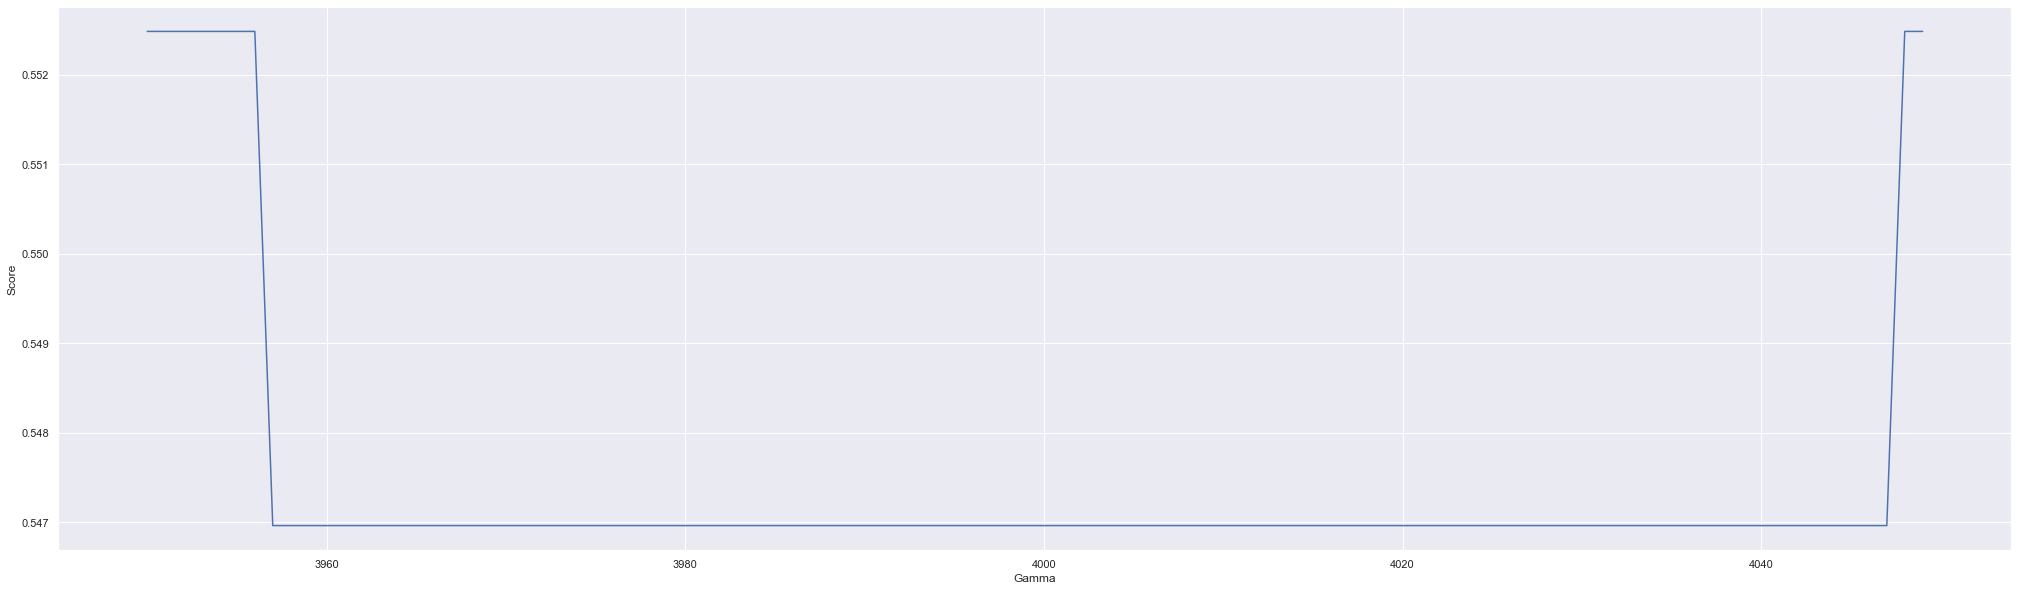

In [461]:
#test SVC model with different params(gamma)
from sklearn.svm import SVC
params = range(3950,4050)
test_scores = []
for param in params:
    clf = SVC(gamma = param)
    clf.fit(X_train_VB, y_trainB, sample_weight = None)
    clf.predict(X_test_VB)
    test_scores.append(clf.score(X_test_VB, y_testB))
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(35, 10))
plt.plot(params, test_scores)
plt.xlabel("Gamma")
plt.ylabel("Score")

In [463]:
#we can get the best score when gamma = 4000
from sklearn.svm import SVC

clf2 = SVC(gamma = 3950)
clf2.fit(X_train_VB,y_trainB)
clf2.predict(X_test_VB)
clf2.score(X_test_VB,y_testB)


0.5524861878453039

In [465]:
import sklearn.metrics as sm
bg = sm.classification_report(y_testB,clf2.predict(X_test_VB))
print(bg, sep='\n')

              precision    recall  f1-score   support

           0       0.57      0.45      0.50        91
           1       0.54      0.66      0.59        90

    accuracy                           0.55       181
   macro avg       0.56      0.55      0.55       181
weighted avg       0.56      0.55      0.55       181



## Consider the data volume of business news is nearly 50% of all news, this accuracy seems acceptable